In [2]:
## Load basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
## Read Data
data= pd.read_csv("/Users/ashutosh/datasets/SonarMinesRocks/sonarminesrocks.csv")

In [10]:
data.shape

(208, 61)

In [11]:
data.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s52,s53,s54,s55,s56,s57,s58,s59,s60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [14]:
data.groupby('class').size()

class
M    111
R     97
dtype: int64

In [16]:
## Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [17]:
data.shape

(208, 61)

In [18]:
data.dtypes

s1       float64
s2       float64
s3       float64
s4       float64
s5       float64
s6       float64
s7       float64
s8       float64
s9       float64
s10      float64
s11      float64
s12      float64
s13      float64
s14      float64
s15      float64
s16      float64
s17      float64
s18      float64
s19      float64
s20      float64
s21      float64
s22      float64
s23      float64
s24      float64
s25      float64
s26      float64
s27      float64
s28      float64
s29      float64
s30      float64
          ...   
s32      float64
s33      float64
s34      float64
s35      float64
s36      float64
s37      float64
s38      float64
s39      float64
s40      float64
s41      float64
s42      float64
s43      float64
s44      float64
s45      float64
s46      float64
s47      float64
s48      float64
s49      float64
s50      float64
s51      float64
s52      float64
s53      float64
s54      float64
s55      float64
s56      float64
s57      float64
s58      float64
s59      float

In [19]:
data.describe()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


### Data Vizualizations

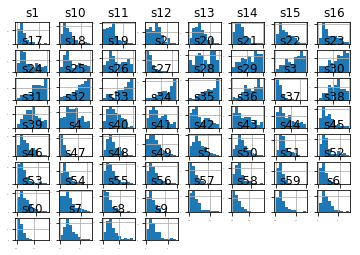

In [20]:
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

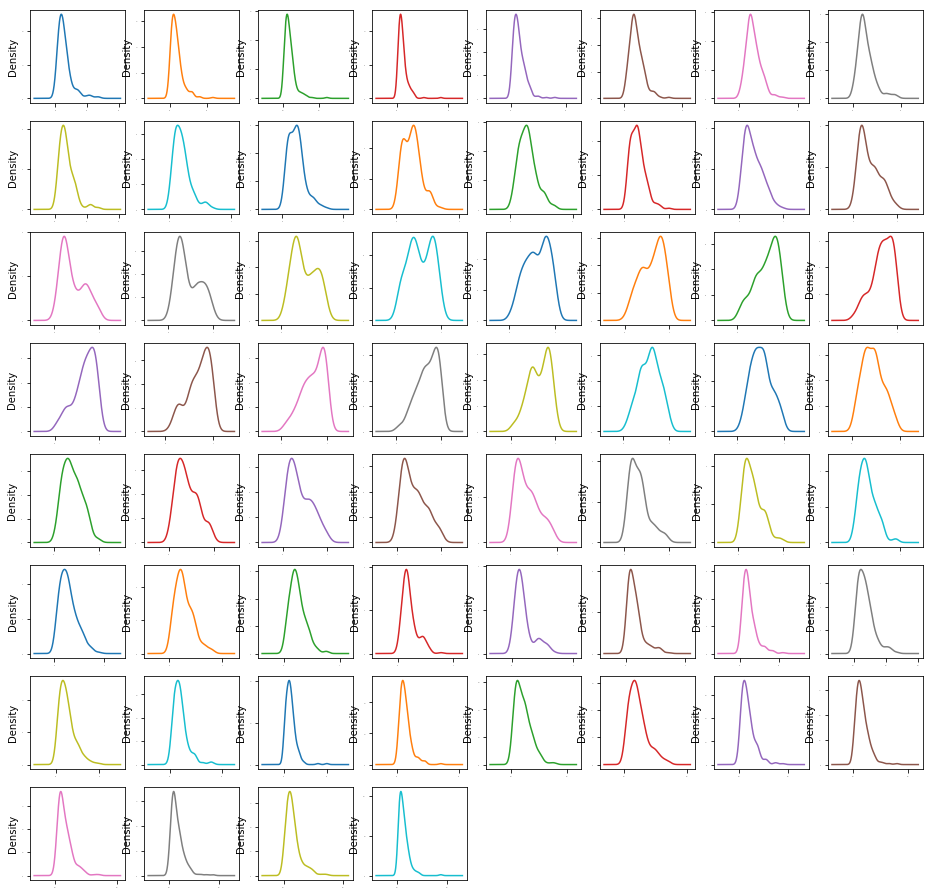

In [23]:
data.plot(kind='density', subplots=True, figsize=(16,16), layout=(8,8), sharex=False, legend=False, fontsize=1)
plt.show()

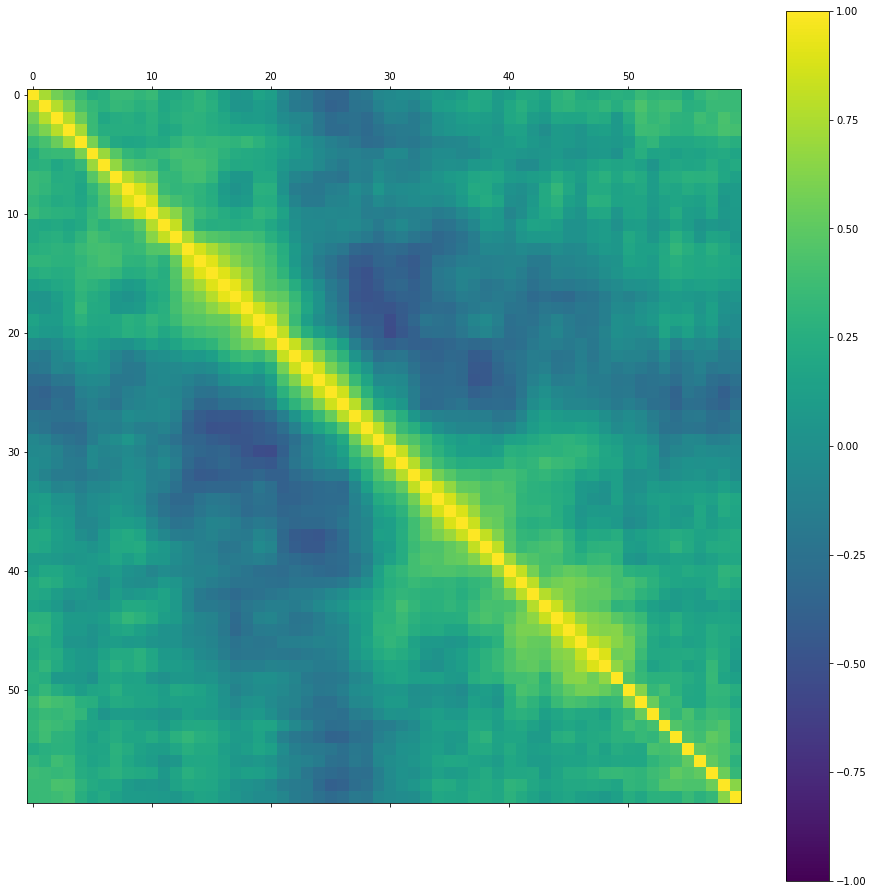

In [24]:
# correlation matrix
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()


In [25]:
## Separate Validation Dataset
array = data.values
X = array[:,0:60]
Y = array[:,60]
val_size=0.2
seed = 7
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = val_size, random_state=seed)
print (X_train.shape)
print (X_val.shape)
print (Y_train.shape)
print (Y_val.shape)

(166, 60)
(42, 60)
(166,)
(42,)


### Evaluation Algorithms

In [28]:
## Test Option and evaluation metrics
num_folds = 10
seed = 7
scoring = 'accuracy'

In [29]:
## Linear Algo : Logistic, LDA
## NonLinear Algo : CART, SVM, NB, KNN
## Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [30]:
results = []
names=[]
for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.735294 (0.096727)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


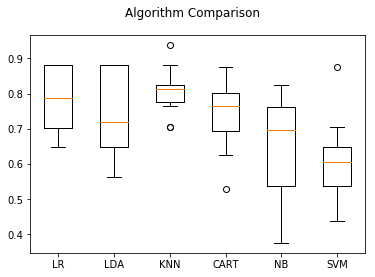

In [31]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Standardising Data

In [32]:
#Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', KNeighborsClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', LogisticRegression())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [34]:
results = []
names=[]
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by S

ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.825735 (0.054511)
ScaledKNN: 0.734191 (0.095885)
ScaledCART: 0.686765 (0.075842)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by S

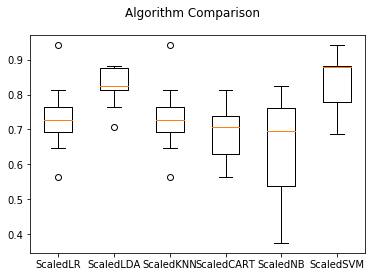

In [39]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Algorithm Tuning

In [ ]:
## KNN: Accuracy: 73.4
## LDA: Accuracy: 82.5
## SVM: Accuracy: 83.6

In [41]:
## Tuning KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,19,21]
param_grid = dict(n_neighbors = neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits = num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX,Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Best: 0.849398 using {'n_neighbors': 1}
0.849398 (0.059881) with: {'n_neighbors': 1}
0.837349 (0.066303) with: {'n_neighbors': 3}
0.837349 (0.037500) with: {'n_neighbors': 5}
0.765060 (0.089510) with: {'n_neighbors': 7}
0.753012 (0.086979) with: {'n_neighbors': 9}
0.734940 (0.104890) with: {'n_neighbors': 11}
0.734940 (0.105836) with: {'n_neighbors': 13}
0.728916 (0.075873) with: {'n_neighbors': 15}
0.722892 (0.084555) with: {'n_neighbors': 19}
0.710843 (0.108829) with: {'n_neighbors': 21}


In [42]:
### Tuning SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Best: 0.867470 using {'C': 1.5, 'kernel': 'rbf'}
0.759036 (0.098863) with: {'C': 0.1, 'kernel': 'linear'}
0.530120 (0.118780) with: {'C': 0.1, 'kernel': 'poly'}
0.572289 (0.130339) with: {'C': 0.1, 'kernel': 'rbf'}
0.704819 (0.066360) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746988 (0.108913) with: {'C': 0.3, 'kernel': 'linear'}
0.644578 (0.132290) with: {'C': 0.3, 'kernel': 'poly'}
0.765060 (0.092312) with: {'C': 0.3, 'kernel': 'rbf'}
0.734940 (0.054631) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740964 (0.083035) with: {'C': 0.5, 'kernel': 'linear'}
0.680723 (0.098638) with: {'C': 0.5, 'kernel': 'poly'}
0.789157 (0.064316) with: {'C': 0.5, 'kernel': 'rbf'}
0.746988 (0.059265) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746988 (0.084525) with: {'C': 0.7, 'kernel': 'linear'}
0.740964 (0.127960) with: {'C': 0.7, 'kernel': 'poly'}
0.813253 (0.084886) with: {'C': 0.7, 'kernel': 'rbf'}
0.753012 (0.058513) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.759036 (0.096940) with: {'C': 0.9, 'kernel': 'linear'

### Ensemble Methods

In [43]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.813971 (0.066017)
GBM: 0.830147 (0.094089)
RF: 0.776103 (0.070363)
ET: 0.758456 (0.095942)


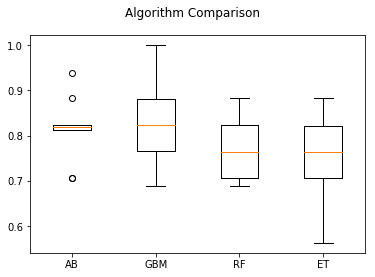

In [44]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Finalize Model : SVM

In [45]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_val)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.857142857143
[[23  4]
 [ 2 13]]
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42



/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [46]:
Y_val

array(['R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M',
       'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R'], dtype=object)